In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"/content/NL-classification.csv")

In [3]:
df.head()

,Text,Label
0,I went on a successful date with someone I fel...,affection
1,I was happy when my son got 90% marks in his e...,affection
2,I went to the gym this morning and did yoga.,exercise
3,We had a serious talk with some friends of our...,bonding
4,I went with grandchildren to butterfly display...,affection


In [4]:
df['Label'].value_counts()

,count
Label,
affection,4320
achievement,3849
enjoy_the_moment,1398
bonding,1340
leisure,900
nature,277
exercise,180


In [5]:
df.isnull().sum()

,0
Text,0
Label,0


In [6]:
import nltk

In [7]:
df['Text'].apply(len)

,Text
0,77
1,56
2,44
3,130
4,68
...,...
12259,51
12260,59
12261,161
12262,135


In [8]:
df['num_chr'] = df['Text'].apply(len)

In [9]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [10]:
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [11]:
df.head()

,Text,Label,num_chr,num_words
0,I went on a successful date with someone I fel...,affection,77,15
1,I was happy when my son got 90% marks in his e...,affection,56,13
2,I went to the gym this morning and did yoga.,exercise,44,11
3,We had a serious talk with some friends of our...,bonding,130,27
4,I went with grandchildren to butterfly display...,affection,68,10


In [12]:
df[['num_words','num_chr']].describe()

,num_words,num_chr
count,12264.000000,12264.000000
mean,20.656556,95.800147
std,25.184330,122.587247
min,3.000000,8.000000
25%,10.000000,47.000000
50%,15.000000,70.000000
75%,23.000000,107.000000
max,1287.000000,6498.000000


<Axes: xlabel='num_chr', ylabel='Count'>

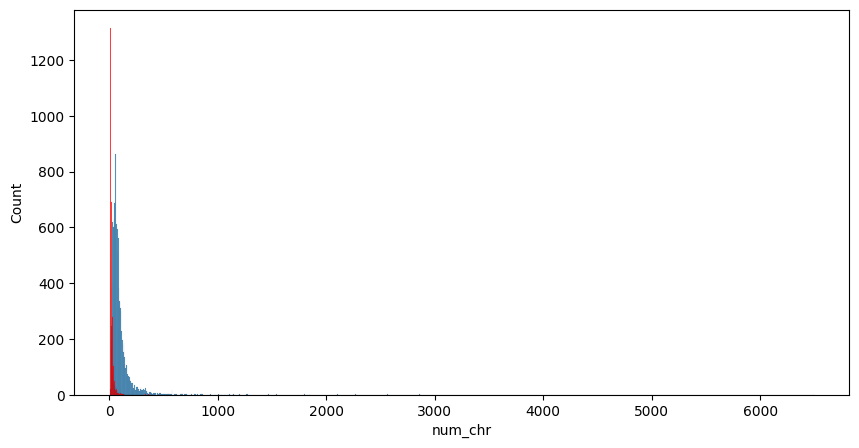

In [13]:
plt.figure(figsize=(10,5))
sns.histplot(df['num_chr'])
sns.histplot(df['num_words'] , color= 'r')

In [14]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df['Text'],df['Label'],test_size=0.3,random_state=5)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [16]:
classifier = Pipeline([('tfidf' , TfidfVectorizer()), ('classifer' , RandomForestClassifier(n_estimators=100))])

In [17]:
classifier.fit(x_train , y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifer', RandomForestClassifier())])

In [18]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [19]:
def acc(y_pred , y_test):
  print(accuracy_score(y_pred , y_test))
  print(classification_report(y_pred , y_test))
  print(confusion_matrix(y_pred , y_test))

In [20]:
y_pre = classifier.predict(x_test)

In [21]:
acc(y_pre , y_test)

0.8116847826086957
                  precision    recall  f1-score   support

     achievement       0.90      0.73      0.81      1435
       affection       0.96      0.84      0.90      1467
         bonding       0.79      0.95      0.86       335
enjoy_the_moment       0.41      0.85      0.56       203
        exercise       0.38      0.96      0.55        25
         leisure       0.62      0.86      0.72       180
          nature       0.39      0.89      0.54        35

        accuracy                           0.81      3680
       macro avg       0.63      0.87      0.70      3680
    weighted avg       0.86      0.81      0.82      3680

[[1053   47   19  183   31   74   28]
 [  92 1234   62   53    3   11   12]
 [   7    7  317    2    0    2    0]
 [  12    1    2  173    1    8    6]
 [   0    0    1    0   24    0    0]
 [  10    1    0    9    3  155    2]
 [   1    0    0    0    1    2   31]]


In [22]:
classifier.predict(['They are in a relationship'])

array(['achievement'], dtype=object)

In [23]:
classifier.predict(['i will go to the gym'])

array(['exercise'], dtype=object)